You can follow this python script to conduct model evaluation and analysis.

1. Import necessary python packages and import the prewritten functions.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

import hvplot.xarray
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import cartopy 
import cartopy.crs as ccrs


import warnings
warnings.filterwarnings("ignore")

from functions import aerosol_dehm

# Part I: Model Evaluation

1. Load the model simulation and observation data. We have a weekly data of simulated and observed xxx in xx station (xxx.csv).

In [2]:
input_file = 'data/Arctic_aerosol_Villum.csv'

df = pd.read_csv(input_file,header=0)
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

print(df.head(5))

        date  SO2_mod  SO2_mea  SO4_mod  SO4_meas  PM2.5_mod  PM2.5_mea
0 2007-01-01    0.440      NaN    0.078       NaN      1.259        NaN
1 2007-01-08    1.445      NaN    0.216       NaN      6.899        NaN
2 2007-01-15    0.944      NaN    0.206       NaN      1.985        NaN
3 2007-01-22    0.350      NaN    0.102       NaN      3.874        NaN
4 2007-01-29    0.498      NaN    0.147       NaN      3.448        NaN


In [3]:
dehm = aerosol_dehm()
ds = dehm.ds.load()
ds

<xarray.Dataset>
Dimensions:      (x: 300, y: 300)
Coordinates:
  * x            (x) int64 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
  * y            (y) int64 0 1 2 3 4 5 6 7 8 ... 292 293 294 295 296 297 298 299
    z            int64 0
Data variables:
    SO2_ugSm-3   (x, y) float64 0.4712 0.4702 0.4705 ... 0.1892 0.189 0.189
    NH4_ugNm-3   (x, y) float64 1.692 1.697 1.697 1.333 ... 0.5821 0.5822 0.5821
    SO4_ugSm-3   (x, y) float64 0.4039 0.4038 0.4037 ... 0.493 0.4929 0.4928
    tSO4_ugSm-3  (x, y) float64 0.6997 0.699 0.699 ... 0.5609 0.5609 0.5607
    PM2.5_ugm-3  (x, y) float64 9.284 9.293 9.301 7.807 ... 4.516 4.517 4.516
    PM10_ugm-3   (x, y) float64 9.927 9.922 9.922 8.229 ... 4.843 4.843 4.842
    SIA_ugm-3    (x, y) float64 6.193 6.2 6.199 5.138 ... 3.056 3.201 3.201 3.2
    lat          (x, y) float64 40.78 40.92 41.06 41.2 ... 43.63 43.48 43.34
    lon          (x, y) float64 -77.0 -77.19 -77.37 -77.56 ... 102.6 102.8 103.0

In [4]:
pm = ds['PM2.5_ugm-3']
pm.hvplot()

:Image   [y,x]   (PM2.5_ugm-3)

In [7]:
ds.hvplot.contourf(
    'x', 'y', 'PM2.5_ugm-3', crs=ccrs.PlateCarree(), projection=ccrs.NorthPolarStereo(central_longitude=-32),
    # 'lon', 'lat', cmap='coolwarm', geo=True, global_extent=True,
    frame_width=500, frame_height=500,
    alpha=.9, rasterize=True, project=True
)

Invoked as dynamic_operation(height=400, scale=1.0, width=400, x_range=None, y_range=None)


DataError: None of the available storage backends were able to support the supplied data format. SpatialPandasInterface raised following error:

 No module named 'spatialpandas'

SpatialPandasInterface expects a list of tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

:DynamicMap   []

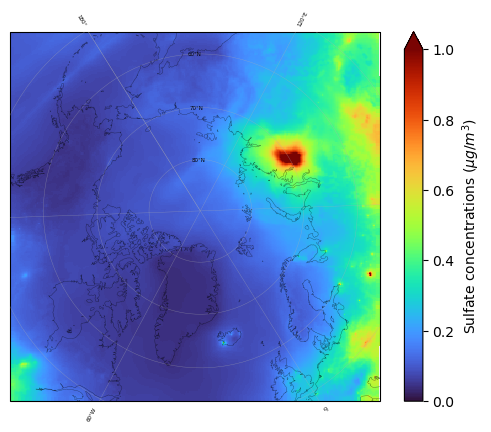

In [ ]:
%matplotlib inline
fig = dehm.plot_annual_map(vmin=0,vmax=1)
fig.show()

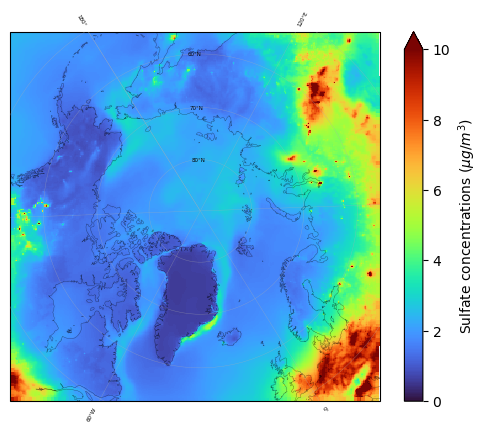

In [ ]:
%matplotlib inline
fig = dehm.plot_annual_map(par='PM2.5_ugm-3',vmin=0,vmax=10)
# fig = dehm.plot_annual_map(vmin=0,vmax=1)
fig.show()